In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
X = digits["data"]

print(X.shape)
X

(1797, 64)


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

### Visualize

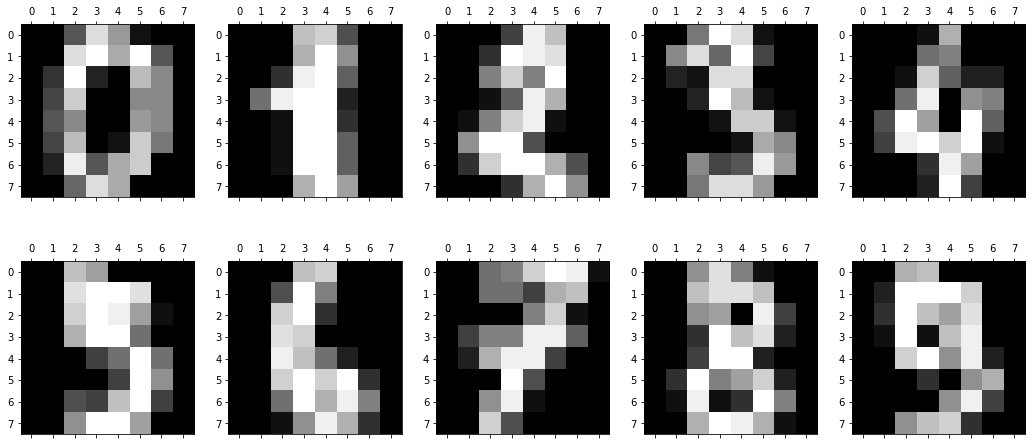

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(18, 8)

axes[0][0].matshow(X[0].reshape(8, 8))
axes[0][1].matshow(X[1].reshape(8, 8))
axes[0][2].matshow(X[2].reshape(8, 8))
axes[0][3].matshow(X[3].reshape(8, 8))
axes[0][4].matshow(X[4].reshape(8, 8))
axes[1][0].matshow(X[5].reshape(8, 8))
axes[1][1].matshow(X[6].reshape(8, 8))
axes[1][2].matshow(X[7].reshape(8, 8))
axes[1][3].matshow(X[8].reshape(8, 8))
axes[1][4].matshow(X[9].reshape(8, 8))

In [5]:
y = digits["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [6]:
X_mean = X.mean()

X = X - X_mean

X.mean(), X.min(), X.max()

(8.995463126623417e-17, -4.8841645798553142, 11.115835420144686)

In [7]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y.shape, y_hot.shape)

Using TensorFlow backend.


(1797,) (1797, 10)


## Define Activation

### Sigmoid

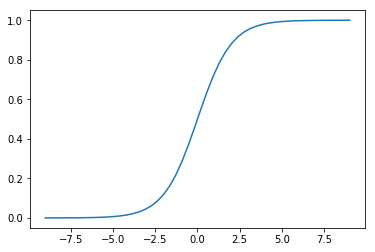

In [8]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

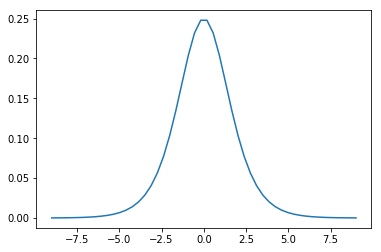

In [9]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

## Define Cross Entropy

In [10]:
def cross_entropy(actual, predict, eps=1e-15):
    actual = np.array(actual)
    predict = np.array(predict)

    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)

    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

## Build a Model

In [11]:
from time import time

def train(X, y, num_epoch, learning_rate, update_method):
    history = []

    start = time()

    w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                           high=+np.sqrt(6 / (64+100)),
                           size=(64, 100))

    w2 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                           high=+np.sqrt(6 / (100+10)),
                           size=(100, 10))

    for epoch in range(num_epoch):
        # Forward Propagation
        z1 = X.dot(w1)
        a1 = sigmoid(z1)
        z2 = a1.dot(w2)
        a2 = sigmoid(z2)

        y_predict = np.argmax(a2, axis=1)

        accuracy = (y_predict == y).mean()
        loss = cross_entropy(a2, y_hot)

        if epoch % (num_epoch // 10) == 0:
            print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

        history.append({
            'epoch': epoch,
            'elapsed': time() - start,
            'accuracy': accuracy,
            'loss': loss,
        })

        # Backpropagation
        d2 = (a2 - y_hot)
        d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

        # Weight gradients
        dw2 = a1.T.dot(d2)
        dw1 = X.T.dot(d1)

        w1, w2 = update_method(epoch, learning_rate, w1, w2, dw1, dw2)

    print("----" * 10)
    print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))
    
    history = pd.DataFrame(history)
    history = history[["epoch", "elapsed", "accuracy", "loss"]]

    return history

### Stochastic Gradient Descent

In [12]:
# Write your code here!

def undated_sgd(epcho , learning_rate , w1 , w2 , dw1, dw2):
    w2 = w2 -learning_rate * dw2
    w1 = w1 -learning_rate * dw1
    
    return w1 , w2

num_epoch = 100
learning_rate = 0.0001 

history_sgd  = train(X ,y ,num_epoch , learning_rate , update_method = undated_sgd ) 

history_sgd.head(10)


  0 accuracy = 0.07290, loss = 18.71459
 10 accuracy = 0.80913, loss = 5.18005
 20 accuracy = 0.89872, loss = 4.20281
 30 accuracy = 0.92154, loss = 3.49037
 40 accuracy = 0.93545, loss = 2.97547
 50 accuracy = 0.94769, loss = 2.58988
 60 accuracy = 0.95659, loss = 2.29141
 70 accuracy = 0.96049, loss = 2.05322
 80 accuracy = 0.96439, loss = 1.85896
 90 accuracy = 0.96772, loss = 1.69799
----------------------------------------
 99 accuracy = 0.96995, loss = 1.57554


,epoch,elapsed,accuracy,loss
0,0,0.012342,0.072899,18.714585
1,1,0.025754,0.106845,5.075533
2,2,0.039083,0.191987,5.290811
3,3,0.053045,0.415136,5.535883
4,4,0.065357,0.559822,5.644426
5,5,0.077119,0.647746,5.644732
6,6,0.089330,0.702282,5.583802
7,7,0.101107,0.741235,5.494031
8,8,0.111757,0.776294,5.392190
9,9,0.123272,0.792432,5.286353


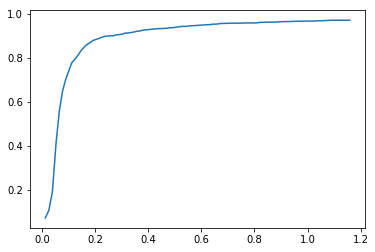

In [13]:
plt.plot ( history_sgd['elapsed'] , history_sgd['accuracy'],label="SGD")

### Momentum

In [16]:
# Write your code here!

mu = 0.9
cache_dw1 , cache_dw2 = 0 , 0 


def updated_momentum(epoch , learning_rate , w1, w2, dw1 , dw2):
    global cache_dw1 , cache_dw2
    cache_dw2 = mu * cache_dw2 - learning_rate * dw2 
    w2 = w2 + cache_dw2
    
    cache_dw1 = mu * cache_dw1 - learning_rate * dw1
    w1 = w1 + cache_dw1
    
    return w1, w2
    
num_epoch = 100
learning_rate = 0.0001 

history_momentum  = train(X ,y ,num_epoch , learning_rate , update_method = updated_momentum ) 
history_momentum.head(10)


  0 accuracy = 0.08292, loss = 17.69982
 10 accuracy = 0.67223, loss = 5.14313
 20 accuracy = 0.90651, loss = 2.50808
 30 accuracy = 0.95326, loss = 1.35658
 40 accuracy = 0.96772, loss = 0.87807
 50 accuracy = 0.97997, loss = 0.66168
 60 accuracy = 0.98720, loss = 0.53357
 70 accuracy = 0.98943, loss = 0.45227
 80 accuracy = 0.99110, loss = 0.39396
 90 accuracy = 0.99332, loss = 0.34909
----------------------------------------
 99 accuracy = 0.99610, loss = 0.31713


,epoch,elapsed,accuracy,loss
0,0,0.005155,0.082916,17.699823
1,1,0.015492,0.107401,4.978397
2,2,0.026690,0.100723,3.842094
3,3,0.038454,0.129104,3.712285
4,4,0.051279,0.217028,3.825756
5,5,0.061396,0.377295,4.350273
6,6,0.072394,0.426822,5.582401
7,7,0.083203,0.541458,6.626858
8,8,0.093713,0.676127,6.665302
9,9,0.104221,0.750696,5.993456


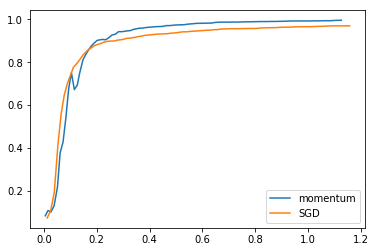

In [20]:
plt.plot ( history_momentum['elapsed'] , history_momentum['accuracy'] ,label="momentum")
plt.plot ( history_sgd['elapsed']      , history_sgd['accuracy']      ,label="SGD")

plt.legend()

### Nesterov Momentum

In [23]:
# Write your code here!
mu = 0.9
cache_dw1 , cache_dw2 = 0,0

def updated_nesterov(epoch , learning_rate , w1, w2, dw1 , dw2):
    global cache_dw1 , cache_dw2
    
    dw2_prev = cache_dw2 
    cache_dw2 = mu * cache_dw2 - learning_rate * dw2
    w2 = w2 + (-mu * dw2_prev) + (1 + mu) * cache_dw2
    
    dw1_prev = cache_dw1 
    cache_dw1 = mu * cache_dw1 - learning_rate * dw1
    w1 = w1 + (-mu * dw1_prev) + (1 + mu) * cache_dw1
    
    return w1, w2
    
num_epoch = 100
learning_rate = 0.0001 

history_nesterov  = train(X ,y ,num_epoch , learning_rate , update_method = updated_nesterov ) 
history_nesterov.head(10)



  0 accuracy = 0.10907, loss = 16.13183
 10 accuracy = 0.85364, loss = 4.06708
 20 accuracy = 0.94046, loss = 1.99477
 30 accuracy = 0.96661, loss = 1.10509
 40 accuracy = 0.97997, loss = 0.74084
 50 accuracy = 0.98442, loss = 0.57210
 60 accuracy = 0.98943, loss = 0.47219
 70 accuracy = 0.99277, loss = 0.40463
 80 accuracy = 0.99388, loss = 0.35583
 90 accuracy = 0.99499, loss = 0.31842
----------------------------------------
 99 accuracy = 0.99555, loss = 0.29166


,epoch,elapsed,accuracy,loss
0,0,0.004986,0.109071,16.131834
1,1,0.016684,0.099610,3.821324
2,2,0.028377,0.132999,3.901477
3,3,0.039735,0.302727,4.417661
4,4,0.050531,0.445186,5.076878
5,5,0.061197,0.488592,5.538734
6,6,0.072034,0.641625,5.521485
7,7,0.082528,0.787423,5.337518
8,8,0.092738,0.756817,4.986134
9,9,0.102976,0.791319,4.493393


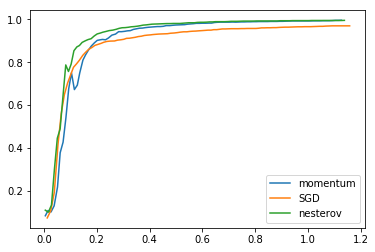

In [24]:
plt.plot ( history_momentum['elapsed'] , history_momentum['accuracy'] ,label="momentum")
plt.plot ( history_sgd['elapsed']      , history_sgd['accuracy']      ,label="SGD")
plt.plot ( history_nesterov['elapsed'] , history_nesterov['accuracy'] ,label="nesterov")

plt.legend()

### AdaGrad

In [27]:
# Write your code here!

eps = 0.0000000001
cache_dw1 , cache_dw2 = 0 , 0 

def updated_adagrad(epoch , learning_rate , w1, w2, dw1 , dw2):
    global cache_dw1 , cache_dw2
    
    cache_dw2 = cache_dw2 + dw2 ** 2 
    w2 = w2 - learning_rate * dw2 / np.sqrt(cache_dw2 + eps )
    
    cache_dw1 = cache_dw1 + dw1 ** 2 
    w1 = w1 - learning_rate * dw1 / np.sqrt(cache_dw1 + eps )

    return w1 , w2 

num_epoch = 100
learning_rate = 0.01

history_adagrad  = train(X ,y ,num_epoch , learning_rate , update_method = updated_adagrad ) 
history_adagrad.head(10)



  0 accuracy = 0.11185, loss = 16.36925
 10 accuracy = 0.85253, loss = 5.30571
 20 accuracy = 0.89316, loss = 4.45426
 30 accuracy = 0.91541, loss = 3.93675
 40 accuracy = 0.93322, loss = 3.55845
 50 accuracy = 0.93767, loss = 3.26253
 60 accuracy = 0.94713, loss = 3.02202
 70 accuracy = 0.95103, loss = 2.81929
 80 accuracy = 0.95548, loss = 2.64624
 90 accuracy = 0.95938, loss = 2.49771
----------------------------------------
 99 accuracy = 0.96327, loss = 2.38032


,epoch,elapsed,accuracy,loss
0,0,0.004434,0.111853,16.369253
1,1,0.019132,0.225376,9.993444
2,2,0.030531,0.400111,7.988475
3,3,0.044888,0.539232,7.051565
4,4,0.060823,0.628269,6.540167
5,5,0.075258,0.717307,6.213677
6,6,0.091291,0.770173,5.957424
7,7,0.108238,0.809126,5.758741
8,8,0.123181,0.828047,5.584993
9,9,0.135323,0.843628,5.437003


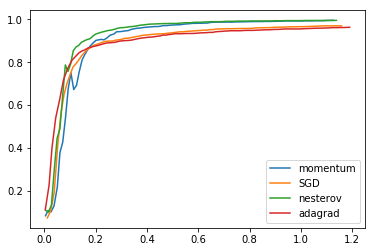

In [28]:
plt.plot ( history_momentum['elapsed'] , history_momentum['accuracy'] ,label="momentum")
plt.plot ( history_sgd['elapsed']      , history_sgd['accuracy']      ,label="SGD")
plt.plot ( history_nesterov['elapsed'] , history_nesterov['accuracy'] ,label="nesterov")
plt.plot ( history_adagrad['elapsed'] , history_adagrad['accuracy'] ,label="adagrad")


plt.legend()

### RMSProp

In [37]:
# Write your code here!


eps = 0.000000001
decay = 0.995 
cache_dw1 , cache_dw2 = 0 , 0 

def updated_rmsprop(epoch , learning_rate , w1, w2, dw1 , dw2):
    global cache_dw1 , cache_dw2
    
    cache_dw2 = decay * cache_dw2 + (1 - decay ) * dw2 ** 2
    w2 = w2 - learning_rate * dw2 / np.sqrt(cache_dw2 + eps)
    
    cache_dw1 = decay * cache_dw1 + (1 - decay ) * dw1 ** 2
    w1 = w1 - learning_rate * dw1 / np.sqrt(cache_dw1 + eps)
    

    return w1 , w2 

num_epoch = 100
learning_rate = 0.003

history_rmsprop  = train(X ,y ,num_epoch , learning_rate , update_method = updated_rmsprop ) 
history_rmsprop.head(10)



  0 accuracy = 0.06121, loss = 19.46935
 10 accuracy = 0.89928, loss = 4.23575
 20 accuracy = 0.95548, loss = 3.04555
 30 accuracy = 0.96828, loss = 2.39514
 40 accuracy = 0.97663, loss = 1.97234
 50 accuracy = 0.97830, loss = 1.68589
 60 accuracy = 0.98275, loss = 1.47589
 70 accuracy = 0.98442, loss = 1.31399
 80 accuracy = 0.98776, loss = 1.18428
 90 accuracy = 0.98998, loss = 1.07700
----------------------------------------
 99 accuracy = 0.99054, loss = 0.99218


,epoch,elapsed,accuracy,loss
0,0,0.004645,0.061213,19.469351
1,1,0.016678,0.154146,5.014298
2,2,0.027707,0.380078,5.452210
3,3,0.038444,0.644964,5.227609
4,4,0.049478,0.804674,5.162506
5,5,0.060581,0.815248,5.082201
6,6,0.072447,0.864775,4.899828
7,7,0.085839,0.850306,4.801935
8,8,0.096803,0.873678,4.538994
9,9,0.108452,0.889260,4.448674


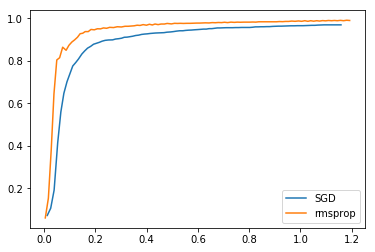

In [38]:
#plt.plot ( history_momentum['elapsed'] , history_momentum['accuracy'] ,label="momentum")
plt.plot ( history_sgd['elapsed']      , history_sgd['accuracy']      ,label="SGD")
#plt.plot ( history_nesterov['elapsed'] , history_nesterov['accuracy'] ,label="nesterov")
#plt.plot ( history_adagrad['elapsed'] , history_adagrad['accuracy'] ,label="adagrad")
plt.plot ( history_rmsprop ['elapsed'] , history_rmsprop ['accuracy'] ,label="rmsprop")

 

plt.legend()

### Adam

In [39]:
# Write your code here!


eps = 0.000000001
beta1 =0.9
beta2 =0.99
dw1m, dw2m = 0,0
dw1v, dw2v = 0,0

def updated_adam(epoch , learning_rate , w1, w2, dw1 , dw2):
    global dw1m, dw2m
    global dw1v, dw2v
    
    dw2m = beta1 * dw2m + (1- beta1) * dw2 
    dw2v = beta2 * dw2v + (1- beta2) * ( dw2**2 )
    dw2mb = dw2m / (1 - beta1 **( 1 + epoch ))
    dw2vb = dw2v / (1 - beta2 **( 1 + epoch ))
    w2 = w2 - learning_rate * dw2mb / np.sqrt( dw2vb + eps) 
    
    dw1m = beta1 * dw1m + (1- beta1) * dw1 
    dw1v = beta2 * dw1v + (1- beta2) * ( dw1**2 )
    dw1mb = dw1m / (1 - beta1 **( 1 + epoch ))
    dw1vb = dw1v / (1 - beta2 **( 1 + epoch ))
    w1 = w1 - learning_rate * dw1mb / np.sqrt( dw1vb + eps)
    
    return w1 , w2 

num_epoch = 100
learning_rate = 0.003

history_adam  = train(X ,y ,num_epoch , learning_rate , update_method = updated_adam ) 
history_adam.head(10)

  0 accuracy = 0.01836, loss = 17.89221
 10 accuracy = 0.33333, loss = 6.04768
 20 accuracy = 0.74346, loss = 4.82800
 30 accuracy = 0.83918, loss = 4.91317
 40 accuracy = 0.89928, loss = 4.50880
 50 accuracy = 0.92042, loss = 3.90535
 60 accuracy = 0.93712, loss = 3.43394
 70 accuracy = 0.94880, loss = 3.00627
 80 accuracy = 0.96160, loss = 2.64886
 90 accuracy = 0.96550, loss = 2.35294
----------------------------------------
 99 accuracy = 0.96995, loss = 2.10911


,epoch,elapsed,accuracy,loss
0,0,0.004721,0.018364,17.892209
1,1,0.014421,0.022259,16.016849
2,2,0.025843,0.031720,14.169192
3,3,0.036608,0.048414,12.450757
4,4,0.047783,0.068447,10.930798
5,5,0.061782,0.094602,9.637011
6,6,0.073983,0.135782,8.566533
7,7,0.085965,0.168058,7.699728
8,8,0.098387,0.216472,7.009768
9,9,0.109013,0.271007,6.468179


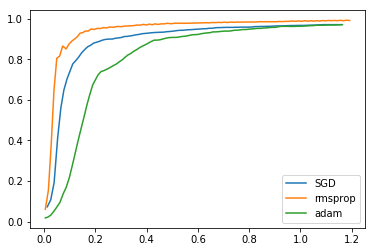

In [40]:
#plt.plot ( history_momentum['elapsed'] , history_momentum['accuracy'] ,label="momentum")
plt.plot ( history_sgd['elapsed']      , history_sgd['accuracy']      ,label="SGD")
#plt.plot ( history_nesterov['elapsed'] , history_nesterov['accuracy'] ,label="nesterov")
#plt.plot ( history_adagrad['elapsed'] , history_adagrad['accuracy'] ,label="adagrad")
plt.plot ( history_rmsprop ['elapsed'] , history_rmsprop ['accuracy'] ,label="rmsprop")
plt.plot ( history_adam ['elapsed'] , history_adam ['accuracy'] ,label="adam")
 

plt.legend()